## QLearning



吃豆人项目地址: https://inst.eecs.berkeley.edu/~cs188/pacman/project_overview.html

In [1]:
from collections import defaultdict
import random, math
import numpy as np

对于一个`Q-Learning`强化学习智能体来说，需要传入的参数有：

1. 环境
2. 智能体学习所需要的超参数，像学习率，折扣因子

需要的方法有:

1. 依据状态选择动作的策略
2. 更新智能体的方法

```python
class QLearningAgent(object):
    def __init__(self, env, learning_rate, epsilon, discount):
        super(QLearningAgent, self).__init__()
        pass
    
    def get_action(self, state):
        pass
    
    def update_agent(self, state, action, reward, next_state):
        pass
```

In [2]:
class QLearningAgent(object):
    def __init__(self, env, learning_rate, epsilon, discount):
        super(QLearningAgent, self).__init__()
        self.legal_action = range(env.action_space.n)  # 获取合法的动作
        
        self.epsilon = epsilon
        self.discount = discount
        self.q_table = defaultdict(lambda: defaultdict(lambda: 0))
        self.lr = learning_rate
    
    def get_action(self, state):
        """
        依据状态选择动作, 加入合法动作是为了方便之后用于复杂环境留的接口
        
        基于epsilon贪婪策略选择动作。
        self.epsilon概率选择随机动作，1 - self.epsilon概率选择最好的动作。
        
        """
        possible_actions = self.legal_action
        
        if len(possible_actions) == 0:
            print("return None")
            return None
        
        epsilon = self.epsilon
        
        if np.random.random() > epsilon:
            possible_q_values = [self.q_table[state][action] for action in possible_actions]
            index = np.argmax(possible_q_values)
            
            return possible_actions[index]
        else:
            
            return random.choice(possible_actions)
    
    def update_agent(self, state, action, reward, next_state):
        """
        Q值更新公式如下:
        Q(s,a) := (1 - lr) * Q(s,a) + lr * (r + gamma * V(s'))
        """
        current_q = self.q_table[state][action]
        
        next_state_possible_actions = self.legal_action
        
        next_v = np.max([self.q_table[next_state][next_action] for next_action in next_state_possible_actions])
        
        new_q = (1 - self.lr) * current_q + self.lr * (reward + self.discount * next_v)
        
        self.q_table[state][action] = new_q

除了上述的这种实现方法之外，还有一种是在计算下一个状态值函数的时候以`epsilon`概率选择最大的`V(next_state)`, `1-epsilon`概率选择平均的`V(next_state)`。

## Q-Learning用于离散状态空间

In [3]:
import gym
env = gym.make("Taxi-v3")

In [4]:
print("observation_space {}".format(env.observation_space))
print("action_space {}".format(env.action_space))

observation_space Discrete(500)
action_space Discrete(6)


In [5]:
agent = QLearningAgent(env, learning_rate=0.5, epsilon=0.25,discount=0.99)

In [6]:
def play_and_train(env,agent,t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.get_action(s)
        
        next_s, r, done, _ = env.step(a)
        
        agent.update_agent(s, a, r, next_s)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

mean reward -8.41


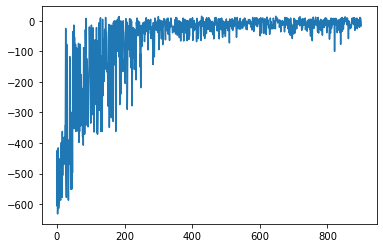

In [7]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

## Q-learning用于连续状态空间

In [8]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
agent = QLearningAgent(env, learning_rate=0.1, epsilon=1.0,discount=0.99)

In [9]:
print("observation_space {}".format(env.observation_space))
print("action_space {}".format(env.action_space))

observation_space Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
action_space Discrete(3)


In [10]:
pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)

def get_state(observation):
    pos, vel =  observation
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)

In [11]:
def play_and_train(env,agent,t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    s = get_state(s)
    
    for t in range(t_max):
        
        a = agent.get_action(s)
        
        next_s, r, done, _ = env.step(a)
        next_s = get_state(next_s)
        
        agent.update_agent(s, a, r, next_s)
        
        s = next_s
        total_reward +=r
        if done: break
    
    return total_reward

episode  0 score  -1000.0 epsilon 1.000
episode  100 score  -1000.0 epsilon 0.996
episode  200 score  -1000.0 epsilon 0.992
episode  300 score  -1000.0 epsilon 0.988
episode  400 score  -1000.0 epsilon 0.984
episode  500 score  -1000.0 epsilon 0.980
episode  600 score  -1000.0 epsilon 0.976
episode  700 score  -1000.0 epsilon 0.972
episode  800 score  -1000.0 epsilon 0.968
episode  900 score  -1000.0 epsilon 0.964
episode  1000 score  -1000.0 epsilon 0.960
episode  1100 score  -1000.0 epsilon 0.956
episode  1200 score  -1000.0 epsilon 0.952
episode  1300 score  -1000.0 epsilon 0.948
episode  1400 score  -1000.0 epsilon 0.944
episode  1500 score  -1000.0 epsilon 0.940
episode  1600 score  -1000.0 epsilon 0.936
episode  1700 score  -1000.0 epsilon 0.932
episode  1800 score  -1000.0 epsilon 0.928
episode  1900 score  -1000.0 epsilon 0.924
episode  2000 score  -1000.0 epsilon 0.920
episode  2100 score  -1000.0 epsilon 0.916
episode  2200 score  -1000.0 epsilon 0.912
episode  2300 score  -1

episode  19200 score  -194.0 epsilon 0.232
episode  19300 score  -207.0 epsilon 0.228
episode  19400 score  -162.0 epsilon 0.224
episode  19500 score  -289.0 epsilon 0.220
episode  19600 score  -229.0 epsilon 0.216
episode  19700 score  -229.0 epsilon 0.212
episode  19800 score  -183.0 epsilon 0.208
episode  19900 score  -164.0 epsilon 0.204
episode  20000 score  -290.0 epsilon 0.200
episode  20100 score  -250.0 epsilon 0.196
episode  20200 score  -186.0 epsilon 0.192
episode  20300 score  -291.0 epsilon 0.188
episode  20400 score  -247.0 epsilon 0.184
episode  20500 score  -201.0 epsilon 0.180
episode  20600 score  -273.0 epsilon 0.176
episode  20700 score  -245.0 epsilon 0.172
episode  20800 score  -140.0 epsilon 0.168
episode  20900 score  -300.0 epsilon 0.164
episode  21000 score  -194.0 epsilon 0.160
episode  21100 score  -249.0 epsilon 0.156
episode  21200 score  -157.0 epsilon 0.152
episode  21300 score  -166.0 epsilon 0.148
episode  21400 score  -216.0 epsilon 0.144
episode  21

episode  38300 score  -184.0 epsilon 0.010
episode  38400 score  -150.0 epsilon 0.010
episode  38500 score  -146.0 epsilon 0.010
episode  38600 score  -158.0 epsilon 0.010
episode  38700 score  -149.0 epsilon 0.010
episode  38800 score  -223.0 epsilon 0.010
episode  38900 score  -154.0 epsilon 0.010
episode  39000 score  -146.0 epsilon 0.010
episode  39100 score  -146.0 epsilon 0.010
episode  39200 score  -204.0 epsilon 0.010
episode  39300 score  -151.0 epsilon 0.010
episode  39400 score  -201.0 epsilon 0.010
episode  39500 score  -191.0 epsilon 0.010
episode  39600 score  -188.0 epsilon 0.010
episode  39700 score  -138.0 epsilon 0.010
episode  39800 score  -143.0 epsilon 0.010
episode  39900 score  -135.0 epsilon 0.010
episode  40000 score  -193.0 epsilon 0.010
episode  40100 score  -182.0 epsilon 0.010
episode  40200 score  -121.0 epsilon 0.010
episode  40300 score  -148.0 epsilon 0.010
episode  40400 score  -139.0 epsilon 0.010
episode  40500 score  -184.0 epsilon 0.010
episode  40

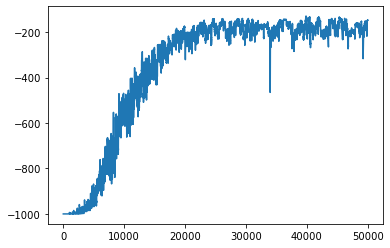

In [12]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
n_games = 50000
avg_rewards = []
total_rewards = np.zeros(n_games)
for i in range(n_games):
    score = play_and_train(env, agent)
    total_rewards[i] = score
    
    agent.epsilon = agent.epsilon - 2/n_games if agent.epsilon > 0.01 else 0.01
    if i % 100 ==0:
        print('episode ', i, 'score ', score, 'epsilon %.3f' % agent.epsilon)

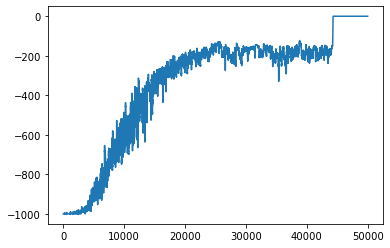

In [15]:
mean_rewards = np.zeros(n_games)
for t in range(n_games):
    mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
plt.plot(mean_rewards)